In [1]:
import diplib as dip
import numpy as np

DIPlib -- a quantitative image analysis library
Version 3.5.1 (Jul  5 2024)
For more information see https://diplib.org


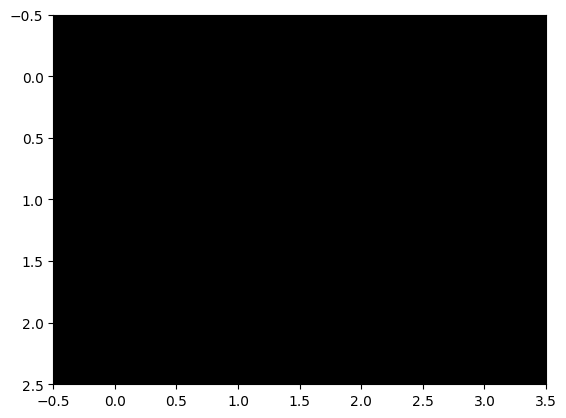

1.0


In [3]:
# 将numpy数组强制转换为PyDIP图像不会导致数据复制，数组和图像将共享数据
arr = np.zeros((3, 4))
img = dip.Image(arr)
dip.Show(img)
img[0, 0] = 1
print(arr[0, 0])


In [4]:
# PYDIP图像转换成numpy数组 使用np.asarray函数或者np.array(...,copy=False)函数
img = dip.Image((5, 6), 1, "UINT8") # 创建一个5x6的单通道图像 1表示单通道
arr = np.asarray(img)
arr[2, 3] = 10
print(img[3, 2])

[10]


(60, 50, 3)


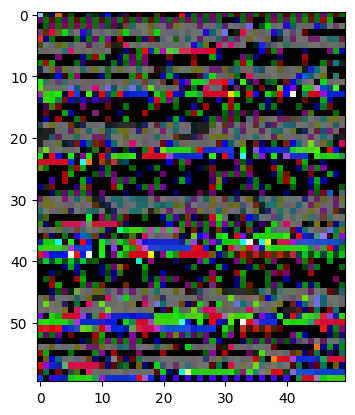

In [6]:
img = dip.Image((50, 60), 3, "UINT8")   # 创建一个50x60的三通道图像 3表示三通道
arr = np.asarray(img)
print(arr.shape)
img.Show()

在将数组转换为图像时，没有指示是否有张量维度，以及它是哪个。因此，PyDIP使用一个简单的启发式方法来猜测数组是否表示张量（或彩色）图像：如果数组具有两个以上的维度，并且第一个或最后一个维度具有4个或更少的元素，那么该维度就是张量维度。因此，只考虑第一个或最后一个维度。我们选择4作为捕捉RGB和RGBA图像的阈值。

In [9]:
a = dip.Image(arr)
print(a.__repr__())

<Tensor image (3x1 column vector, 3 elements), UINT8, sizes {50, 60}>


上面的输出结果显示图像没有被标记为彩色图像。如果需要的话，必须手动添加以下信息

<Color image (3x1 column vector, 3 elements, sRGB), UINT8, sizes {50, 60}>


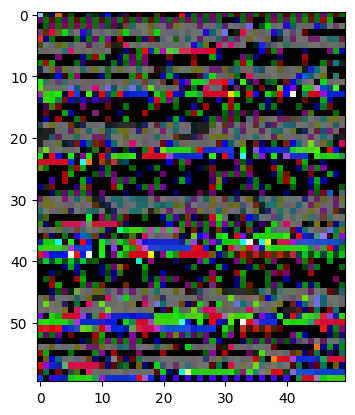

In [11]:
a = dip.Image(arr)
a.SetColorSpace("sRGB")  # 设置颜色空间
print(a.__repr__())
a.Show()

In [ ]:
# 使用PYDIP图像作为numpy的输入 输出将是一个numpy数组
a = np.ravel(img)
print(type(a))
print(a.shape)
print(a.dtype)

将数组作为输入用于PyDIP函数时，输出是PyDIP图像对象，实际上，数组将会被强制转换为图像。这意味着输出图像将拥有与输入数组相同的数据。如果需要，可以使用np.array(..., copy=False)来避免数据复制。

In [14]:
a = dip.Gauss(arr)
a.SetColorSpace("sRGB")
print(a.__repr__())

<Color image (3x1 column vector, 3 elements, sRGB), SFLOAT, sizes {50, 60}>


In [15]:
a = np.zeros(10)
try:
    dip.Gauss(img, out=a)   #img是50*60，当没有合适的输出（例如a只有10个元素）时，会抛出异常
except Exception as e:
    print(f"\033[31m{type(e).__name__} exception:", str(e).split('\n')[0])

ParameterError exception: Image is protected


In [17]:
a = np.zeros((60, 50, 3))   #需要注意的是，这里的形状是(60, 50, 3)而不是(50, 60, 3)
dip.Gauss(img, out=a)

In [20]:
dip.Gauss(arr, out=arr) # arr是一个数组，输出也是一个数组
print(type(arr))

<class 'numpy.ndarray'>
